# Given correlation coefficient r of X and Y, and given X, now generate Y.

In [1]:
# plot results 

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap

# here..
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

x_y_label_font = 20
x_y_legend_font = 20

plt.rc('font', family='Times New Roman')
fig_dpi = 220
fig_shape_squre = (6, 5)

def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh), dpi=100)
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list
    plt.show()


class MyColor(object):
    def __init__(self, cmap_name, skip_idx=5, backup_name='Set1', 
                 backup_color=3, add_red=False, pre_defined=False):
        if pre_defined:
            # colors = ['#3682be','#45a776','#f05326','#eed777','#334f65','#b3974e','#38cb7d','#ddae33','#844bb3','#93c555','#5f6694','#df3881']
            colors = '00a8e1 - 99cc00 - e30039 - 800080 - 00994e - ff6600 - 808000 - db00c2 - 008080 - 0000ff - c8cc00'
            colors = ["#"+c.strip() for c in colors.split('-')]
            print(colors)
            cmap = ListedColormap(colors, name = 'mycmap')
            self.color_set = list(cmap.colors)
        else:
            if isinstance(cmap_name, list):
                #NOTE: combine all cmaps:
                self.color_set = []
                for cname in cmap_name:
                    self.color_set.extend(list(plt.get_cmap(cname).colors))
                print('color_set: ', self.color_set[15])
            else:
                self.color_set = list(plt.get_cmap(cmap_name).colors)
                
        # NOTE: always ignore light yellow in Set1

        if add_red:
            self.light_set = list(plt.get_cmap('Set1').colors)
            self.color_set  = [v for i, v in enumerate(list(plt.get_cmap(cmap_name).colors)[:-1]) if i!=5]
            self.color_set.extend([self.light_set[0]])
            self.color_set.extend([self.light_set[4]])

        self.backup_set = plt.get_cmap(backup_name).colors
        self.backup_color = backup_color
        self.skip_idx=skip_idx
        self.idx = 0
        self.color_len = len(self.color_set)
        
    def get_color(self):
        if self.idx == self.color_len - 1:
            self.idx = 0
        if self.idx == self.skip_idx:
            self.idx += 1
            return self.backup_set[self.backup_color]
        color = self.color_set[self.idx]
        self.idx += 1
        return color
    
    def shuffle(self):
        np.random.shuffle(self.color_set)
    

plot_color_gradients('Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])


<Figure size 640x338.2 with 13 Axes>

In [2]:
import numpy as np
from scipy.stats import pearsonr,pointbiserialr

# Step 1: Generate X values from normal distribution
sample_size = 1000  # Larger sample size for better approximation
X = np.random.normal(loc=0, scale=1, size=sample_size)

# Step 2: Calculate expected mean and standard deviation of Y
r = 0.5  # Replace with desired correlation coefficient
mu = 0  # Replace with desired mean of Y
sigma = r * np.std(X)

# Step 3: Generate Y values from binomial distribution
p = (r * sigma / np.std(X)) + mu
Y = np.random.binomial(n=1, p=p, size=sample_size)

# Step 4: Calculate Pearson correlation coefficient
correlation_coefficient_pearson, _ = pearsonr(X, Y)

# Step 5: Calculate Point-biserial correlation coefficient
correlation_coefficient_pointbiserial, _ = pointbiserialr(X, Y)

print("Pearson Correlation Coefficient: ", correlation_coefficient_pearson)
print("Point-biserial Correlation Coefficient: ", correlation_coefficient_pointbiserial)


Pearson Correlation Coefficient:  -0.029201172223365674
Point-biserial Correlation Coefficient:  -0.029201172223365674


In [3]:
import numpy as np
from scipy.stats import pearsonr, pointbiserialr

# Input correlation coefficient (r)
r = 0.8

# Input sample size
sample_size = 100000

# Generate X values from normal distribution
X = np.random.normal(0, 1, sample_size)

# Calculate corresponding Y values based on correlation coefficient (r)
Y = r * X + np.random.normal(0, np.sqrt(1 - r**2), sample_size)

# Round Y values to the nearest integer between 1 and 100
Y = np.round(Y * 49 + 50)

# Convert Y values to integers
Y = Y.astype(int)

# Calculate Pearson correlation coefficient

# Calculate probabilities of Y taking values 1 to 100
probs_Y = []
for i in range(1, 101):
    prob_Y = np.sum(Y == i) / sample_size
    probs_Y.append(prob_Y)

pearson_corr, _ = pearsonr(X, Y)

# Calculate Point-biserial correlation coefficient
point_biserial_corr, _ = pointbiserialr(X, Y)
# Print Pearson and Point-biserial correlation coefficients and probabilities of Y
print("Pearson correlation coefficient:", pearson_corr)
print("Point-biserial correlation coefficient:", point_biserial_corr)
# print("Probabilities of Y taking values 1 to 100:")
# for i, prob_Y in enumerate(probs_Y):
#     print(f"Probability of Y={i+1}: {prob_Y}")


Pearson correlation coefficient: 0.7986856612907053
Point-biserial correlation coefficient: 0.7986856612907053


Pearson correlation coefficient: 0.6192423489355057
Point-biserial correlation coefficient: 0.6192423489355057
Pearson correlation coefficient: 0.8016894897066789
Point-biserial correlation coefficient: 0.8016894897066789


Text(0.5, 1.0, 'Scatter Plot: X vs Y (continuous)')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


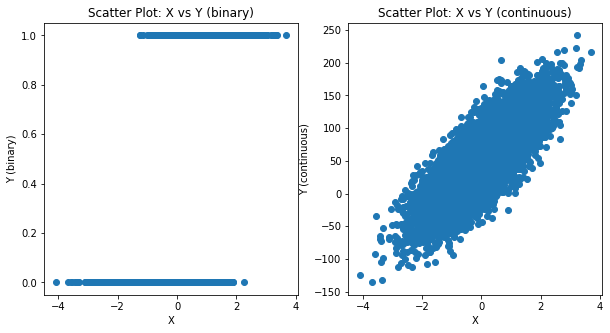

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Input correlation coefficient (r)
r = 0.8

# Input sample size
sample_size = 10000

# Generate X values from normal distribution
X = np.random.normal(0, 1, sample_size)

# Generate Y values that can only be 0 or 1
Y_binary = np.round(r * X + np.random.normal(0, np.sqrt(1 - r**2), sample_size))

Y_binary[Y_binary < 0] = 0
Y_binary[Y_binary > 1] = 1

Y = Y_binary
pearson_corr, _ = pearsonr(X, Y)

# Calculate Point-biserial correlation coefficient
point_biserial_corr, _ = pointbiserialr(X, Y)
# Print Pearson and Point-biserial correlation coefficients and probabilities of Y
print("Pearson correlation coefficient:", pearson_corr)
print("Point-biserial correlation coefficient:", point_biserial_corr)



# Generate Y values ranging from 1 to 100
Y_continuous = r * X + np.random.normal(0, np.sqrt(1 - r**2), sample_size)

# Round Y values to the nearest integer between 1 and 100
Y_continuous = np.round(Y_continuous * 49 + 50)

# Convert Y values to integers
Y_continuous = Y_continuous.astype(int)

Y = Y_continuous
pearson_corr, _ = pearsonr(X, Y)
# Calculate Point-biserial correlation coefficient
point_biserial_corr, _ = pointbiserialr(X, Y)
# Print Pearson and Point-biserial correlation coefficients and probabilities of Y
print("Pearson correlation coefficient:", pearson_corr)
print("Point-biserial correlation coefficient:", point_biserial_corr)


# Create scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(X, Y_binary)
ax1.set_xlabel('X')
ax1.set_ylabel('Y (binary)')
ax1.set_title('Scatter Plot: X vs Y (binary)')

ax2.scatter(X, Y_continuous)
ax2.set_xlabel('X')
ax2.set_ylabel('Y (continuous)')
ax2.set_title('Scatter Plot: X vs Y (continuous)')

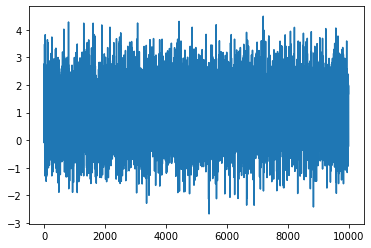

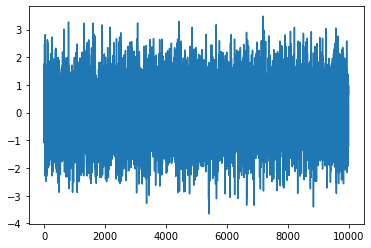

mean_X1:  4.689582056016661e-17
mean_X2:  -1.1644019082268641e-16
mean_X3:  1.6981971384666395e-16


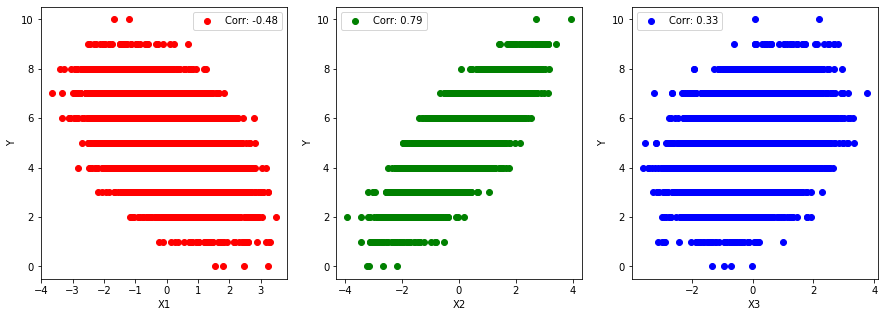

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import preprocessing


def z_norm(x_data):
    min_max_scaler = preprocessing.MinMaxScaler()
    return min_max_scaler.fit_transform(x_data)

def mean_norm(x_data):
    scaler = preprocessing.StandardScaler()
    return scaler.fit_transform(x_data)


def generate_Y_from_X(X1, X2, X3, r1, r2, r3):
    """
    Generates values for variable Y from {0, 1, 2} based on the given independent variables X1, X2, X3 and their
    corresponding correlation coefficients r1, r2, r3.
    
    Args:
        X1 (ndarray): Sample of variable X1 from normal distribution.
        X2 (ndarray): Sample of variable X2 from normal distribution.
        X3 (ndarray): Sample of variable X3 from normal distribution.
        r1 (float): Correlation coefficient between X1 and Y.
        r2 (float): Correlation coefficient between X2 and Y.
        r3 (float): Correlation coefficient between X3 and Y.
        
    Returns:
        ndarray: Generated values for variable Y.
    """
    # Calculate the mean and standard deviation of X1, X2, X3
    X1= X1.squeeze()
    X2= X2.squeeze()
    X3= X3.squeeze()
    
    mean_X1 = np.mean(X1)
    mean_X2 = np.mean(X2)
    mean_X3 = np.mean(X3)
    
    print('mean_X1: ', mean_X1)
    print('mean_X2: ', mean_X2)
    print('mean_X3: ', mean_X3)
    
    std_X1 = np.std(X1)
    std_X2 = np.std(X2)
    std_X3 = np.std(X3)
    
    # Calculate the standard deviation of Y
    std_Y = np.sqrt((std_X1**2 * r1**2 + std_X2**2 * r2**2 + std_X3**2 * r3**2) / (r1**2 + r2**2 + r3**2 + 2*r1*r2*r3))
    
    # Generate values for Y from normal distribution with mean 0 and calculated standard deviation
    # Y = np.random.normal(loc=0, scale=std_Y, size=len(X1))
    
    # Add the means of X1, X2, X3 and the calculated standard deviation of Y to the generated values to get the final values for Y
    # Y = mean_X1 + mean_X2 + mean_X3 + r1 * ((X1 - mean_X1) * std_Y / std_X1) + r2 * ((X2 - mean_X2) * std_Y / std_X2) + r3 * ((X3 - mean_X3) * std_Y / std_X3)
    Y = r1 * ((X1 - mean_X1) * std_Y / std_X1) + r2 * ((X2 - mean_X2) * std_Y / std_X2) + r3 * ((X3 - mean_X3) * std_Y / std_X3)
    
    # Round the generated values of Y to the nearest integer and clip them to be within {0, 1, 2}
    # Y = np.round(Y * 49 + 50).clip(0, 2).astype(int)
    Y = z_norm(Y.reshape(-1, 1))
    Y = Y.squeeze()
    Y = np.round(Y * 10).astype(int)
    
    return Y

# Generate samples of X1, X2, X3 with sample size 100 from normal distribution

normal_dist = True
sample_size=  10000

if not normal_dist:
    X1 = np.random.uniform(10, 100, size=sample_size)
    X2 = np.random.uniform(20, 50, size=sample_size)
    X3 = np.random.uniform(0, 1, size=sample_size)
else:
    X1 = np.random.normal(loc=1, scale=1, size=sample_size)
    X2 = np.random.normal(loc=2, scale=1, size=sample_size)
    X3 = np.random.normal(loc=3, scale=1, size=sample_size)

# Specify the correlation coefficients between X1, X2, X3, and Y
r1 = -0.3
r2 = 0.5
r3 = 0.2

use_z_norm = False

norm = z_norm if use_z_norm else mean_norm

plt.figure()
plt.plot(X1)
plt.show()
X1 = norm(X1.reshape(-1, 1))

plt.figure()
plt.plot(X1)
plt.show()

X2 = norm(X2.reshape(-1, 1))
X3 = norm(X3.reshape(-1, 1))


# Generate values for Y based on X1, X2, X3, and their correlation coefficients
Y = generate_Y_from_X(X1, X2, X3, r1, r2, r3)

# Check the Pearson correlation between X1 and Y, X2 and Y, X3 and Y
corr_X1_Y, _ = pearsonr(X1.squeeze(), Y)
corr_X2_Y, _ = pearsonr(X2.squeeze(), Y)
corr_X3_Y, _ = pearsonr(X3.squeeze(), Y)

# Plot the linear correlation figures for X1 vs Y, X2 vs Y, X3 vs Y in a single figure with different colors
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(X1, Y, color='r', label=f'Corr: {corr_X1_Y:.2f}')
ax[0].set_xlabel('X1')
ax[0].set_ylabel('Y')
ax[0].legend()

ax[1].scatter(X2, Y, color='g', label=f'Corr: {corr_X2_Y:.2f}')
ax[1].set_xlabel('X2')
ax[1].set_ylabel('Y')
ax[1].legend()

ax[2].scatter(X3, Y, color='b', label=f'Corr: {corr_X3_Y:.2f}')
ax[2].set_xlabel('X3')
ax[2].set_ylabel('Y')
ax[2].legend()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import preprocessing
from functools import reduce

def z_norm(x_data):
    min_max_scaler = preprocessing.MinMaxScaler()
    return min_max_scaler.fit_transform(x_data), min_max_scaler

def mean_norm(x_data):
    scaler = preprocessing.StandardScaler()
    return scaler.fit_transform(x_data)



sigmas = [1, 2, 3]

def get_XY(uniform=True, mix=False):
        
    sample_size=  10000

    
    if not uniform:
        ns = [np.random.normal(loc=0, scale=1, size=sample_size) for _ in range(len(sigmas))]
    else:
        ns = [np.random.uniform(0, 1, size=sample_size) for _ in range(len(sigmas))]

    if mix:
        ns[-1] =  np.random.normal(loc=0, scale=1, size=sample_size) if uniform else np.random.uniform(-np.sqrt(3), np.sqrt(3), size=sample_size)
    # Specify the correlation coefficients between X1, X2, X3, and Y

    rs = [-0.7, 0.1, 0.7]
    
    sum_rs = np.sum([r**2 for r in rs])
    print('sum_rs:', sum_rs)

    scale = np.sqrt(12) if uniform else 1
    scale = 1

    sigma_y = 1

    r5 = np.sqrt(1 - np.sum([r**2 for r in rs]))
    rs.extend([r5])

    Xs = [sigmas[i]*ns[i] for i in range(len(sigmas))]
    
    Y = scale * sigma_y * (reduce(lambda x, y: x+y, map(lambda x: x[0]*x[1], zip(rs, ns))))

    Y, _ = z_norm(Y.reshape(-1, 1))
    
    Y = Y.squeeze()
    Y = np.round(Y * 10).astype(int)
    
    return Xs, Y

# # ROUND:

# colors = MyColor(cmap_name="Set2")

# def plot_xy(Xs, Y, ax, x_label):
#     # Check the Pearson correlation between X1 and Y, X2 and Y, X3 and Y
    
#     for i in range(len(ax)):
#         # corr_Xi_Y, _ = pearsonr(Xs[i].squeeze(), Y[int(i/3)])
#         corr_Xi_Y, _ = pearsonr(Xs[i].squeeze(), Y)
#         ax[i].scatter(Xs[i], Y, color=colors.get_color(), label=f'Corr: {corr_Xi_Y:.2f}')
#         ax[i].set_xlabel(x_label[i],fontsize=16)
#         ax[i].set_ylabel('Y', fontsize=16,  rotation = 0)
#         ax[i].set_title(f'Corr: {corr_Xi_Y:.2f}', fontsize=16)
#         ax[i].set_xticklabels(ax[i].get_xticks(), fontsize=12)
#         ax[i].set_yticklabels(ax[i].get_yticks(), fontsize=12)
# # Y = np.round(Y).astype(int)
# from collections import Counter

# Xs_uni, Y_uni = get_XY(uniform=True)
# print('count Y_norm: ', Counter(Y_uni))

# Xs_norm, Y_norm = get_XY(uniform=False, mix=False)
# print('count Y_uni: ', Counter(Y_norm))

# # Plot the linear correlation figures for X1 vs Y, X2 vs Y, X3 vs Y in a single figure with different colors
# fig, axes = plt.subplots(1, 6, figsize=(18, 3), dpi=300)

# # Xs_uni.extend(Xs_norm)

# plot_xy(Xs_uni, Y_uni, axes[:3], ['P1~U(0, 1)', 'P2~U(0, 3)', 'P3~U(0, 4)'])
# plot_xy(Xs_norm, Y_norm, axes[3:], ['P1~N(0, 1)', 'P2~N(0, 4)', 'P3~N(0, 9)'])
# # plot_xy(Xs_norm, Y_norm, axes[1])

# fig.tight_layout()

# NOW, generate graphs with - $\color{red}{given\ properties}$
- $\color{red}{NOTE}$ that, the class is imbalanced.
- $\color{red}{LIST}$ all properties with fixed N: average degree, CC, density, triangles, 4-cycles, 6-cycles, 8-cycles.

In [7]:
# FIXED N = 10, 100, 1000

# P1 = avg_degree: [2, N]
N = 10
sample_size = 10000
p1 = np.random.uniform(2, N, size=sample_size)

sigmas = []



In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

N = 10  # Number of graphs
n_nodes = 200  # Number of nodes in each graph

avg_degrees = []  # To store average degrees of graphs
avg_clustering_coeffs = []  # To store average clustering coefficients of graphs

# Loop for generating N graphs
for i in range(N):
    # Generate random average degree between 20 and 100
    avg_degree = np.random.randint(20, 101)
    # Generate random average clustering coefficient between 0.2 and 0.9
    avg_clustering_coeff = np.random.uniform(0.2, 0.9)
    
    # Ensure avg_degree is within the range (0, n_nodes-1)
    avg_degree = min(avg_degree, n_nodes - 1)
    
    # Generate random graph with given average degree and average clustering coefficient
    G = nx.random_graphs.watts_strogatz_graph(n_nodes, avg_degree, avg_clustering_coeff)
    
    # Append average degree and average clustering coefficient to lists
    avg_degrees.append(avg_degree)
    avg_clustering_coeffs.append(avg_clustering_coeff)

    # Plot the graph

# Plot the average degree and average clustering coefficient of the graphs
plt.plot(avg_degrees, label='Average Degree')
plt.figure()
plt.plot(avg_clustering_coeffs, label='Average Clustering Coefficient')
plt.xlabel('Graph Index')
plt.ylabel('Value')
plt.legend()
plt.title('Average Degree and Average Clustering Coefficient of Generated Graphs')


In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Number of blocks
num_blocks = 4

# Number of nodes in each block
num_nodes = 20

# Probability of rewiring in Watts-Strogatz graph
p_rewire = 0.2

# List to store the generated blocks
blocks = []

# Generate Watts-Strogatz graphs for each block
for i in range(num_blocks):
    block = nx.watts_strogatz_graph(num_nodes, int(num_nodes/2), p_rewire)
    blocks.append(block)

# Create a new empty graph
G = nx.Graph()

# Add each block to the new graph
for block in blocks:
    G = nx.disjoint_union(G, block)

# Nodes in each block to be randomly connected
num_nodes_to_connect = int(num_nodes/10)

# Connect blocks randomly
for i in range(num_blocks):
    nodes_to_connect = random.sample(blocks[i].nodes(), num_nodes_to_connect)
    for node in nodes_to_connect:
        other_block = random.choice(blocks[:i] + blocks[i+1:])
        other_node = random.choice(other_block.nodes())
        G.add_edge(node, other_node)

# Calculate average degree and clustering coefficient
avg_degree = sum(dict(G.degree()).values()) / len(G)
avg_clustering_coefficient = nx.average_clustering(G)

# Plot the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=200, node_color='lightblue', edge_color='gray', with_labels=True)
plt.title("Randomly Connected Watts-Strogatz Graphs")
plt.show()

print("Average Degree: ", avg_degree)
print("Average Clustering Coefficient: ", avg_clustering_coefficient)


# traingles in graph: $n = tr(A^3)/6$

In [ ]:
adj = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]]) 
print(np.trace(adj))

print(adj@adj @ adj)
print(np.trace(adj@adj @ adj))

In [ ]:

# ax.set_ylabel(name, fontsize=16,  rotation = 0)
# ax.set_title(f'Corr: {corr_Xi_Y:.2f}', fontsize=16)
# ax.set_xticklabels(ax[i].get_xticks(), fontsize=12)
# ax.set_yticklabels(ax[i].get_yticks(), fontsize=12)

In [2]:
from functools import reduce
from scipy.sparse import csr_matrix


def rewire_given_cc(desired_cc, G, node_num):
    # Calculate the number of triangles needed to achieve the desired clustering coefficient
    adj = nx.adjacency_matrix(G)
    degrees = [i-1 for i in np.sum(adj, axis=1) if i > 1]
    total_triads = reduce(lambda x, y:x+y, map(lambda x: x*(x-1)/2, degrees))
    desired_triads = int(desired_cc * total_triads)
    actual_triads = sum(nx.triangles(G).values()) // 3
    triads_to_add = desired_triads - actual_triads
    # Add triangles to the graph
    while triads_to_add > 0:
        u, v = random.sample(G.nodes(), k=2)
        if not G.has_edge(u, v) and not G.has_edge(v, u) and not u == v:
            neighbors_u = set(G.neighbors(u))
            neighbors_v = set(G.neighbors(v))
            common_neighbors = neighbors_u.intersection(neighbors_v)
            if len(common_neighbors) > 0:
                w = random.choice(list(common_neighbors))
                G.add_edge(u, v)
                G.add_edge(u, w)
                G.add_edge(v, w)
                triads_to_add -= 1
            
    return G


def add_triangles(G, target_cc, tris_num):
    
    er_nodes = list(G.nodes)
    node_num = len(er_nodes)
    
    tris = [nx.complete_graph(3) for _ in range(tris_num)]
    label_id = node_num
    for i, tr in enumerate(tris):
        tris[i] = nx.relabel_nodes(tr, {0: label_id, 1: label_id+1, 2: label_id+2})
        label_id+=3

    for tr in tris:
        tr_nodes = list(tr.nodes)
        G.add_edge(random.choice(er_nodes), random.choice(tr_nodes))

    for tr in tris:
        G = nx.compose(G, tr)
    
    return G


def get_Y(ns,  rs = None, is_uniform=True):
    
    sum_rs = np.sum([r**2 for r in rs])
    print('sum_rs:', sum_rs)

    scale = np.sqrt(12) if is_uniform else 1
    sigma_y = 1

    r_y = np.sqrt(1 - np.sum([r**2 for r in rs]))
    rs.extend([r_y])

        
    Y = scale * sigma_y * (reduce(lambda x, y: x+y, map(lambda x: x[0]*x[1], zip(rs, ns))))

    Y, _ = z_norm(Y.reshape(-1, 1))
    Y = Y.squeeze()
    Y = np.round(Y * 10).astype(int)
    
    return Y




# tris_num = 10
# tris_num = N*(target_cc - ACC_ER) / (1 - target_cc)

er_nodes = 100

tris_num = np.arange(1, int(er_nodes/6)) # 15
# print('tris_num:  ', tris_num)

samples = []
for tr_num in tris_num:
    G = nx.erdos_renyi_graph(er_nodes - tr_num*3, 0.1 + tr_num*0.01)
    samples.append(add_triangles(G, 1, tr_num))

avg_degrees = [sum(dict(G.degree()).values()) / len(G) for G in samples]
avg_CCs = [nx.average_clustering(G) for G in samples]
Ns = [len(G) for G in samples]
fig, axes = plt.subplots(1, 3, figsize=(12, 3), dpi=150)
axes[0].plot(avg_degrees)
axes[1].plot(avg_CCs)
axes[2].plot(Ns)
# axes[1].plot(check_avg_degree)

plt.tight_layout()

NameError: name 'nx' is not defined

In [3]:
import random
from functools import reduce
import pickle as pk
import os

from sklearn import preprocessing
import networkx as nx
import torch
from torch_geometric.data import InMemoryDataset, Data
from torch_geometric.utils import from_networkx

# fixed node num, fixed average degree, CC ~ U(0.1, 0.5)

def z_norm(x_data):
    min_max_scaler = preprocessing.MinMaxScaler()
    return min_max_scaler.fit_transform(x_data), min_max_scaler

def mean_norm(x_data):
    scaler = preprocessing.StandardScaler()
    return scaler.fit_transform(x_data)


def connect_graphs(g1, g2):
    n1 = list(g1.nodes)
    n2 = list(g2.nodes)
    e1 = random.choices(n1, k=1)[0]
    e2 = random.choices(n2, k=1)[0]
    g_cur = nx.compose(g1, g2)
    g_cur.add_edge(e1, e2)
    return g_cur


def random_connect_graph(graph_list:list):
    # NOTE: relabeling the nodes.
    
    new_graphs = []
    np.random.shuffle(graph_list)
    node_idx = 0
    for g in graph_list:
        len_nodes = len(list(g.nodes))
        mapping = {}
        for i in range(len_nodes):
            mapping[i] = i+node_idx
        new_g = nx.relabel_nodes(g, mapping)
        new_graphs.append(new_g)
        node_idx += len_nodes
        
    g_all = reduce(connect_graphs, new_graphs)
    
    return g_all


def add_square(G, sq_num):
     
    er_nodes = list(G.nodes)
    node_num = len(er_nodes)
    
    added = [nx.cycle_graph(4) for _ in range(sq_num)]
    
    # line graphs:
    
    label_id = node_num
    for i, tr in enumerate(added):
        added[i] = nx.relabel_nodes(tr, {0: label_id, 1: label_id+1, 2: label_id+2, 3:label_id+3})
        label_id+=4

    for tr in added:
        tr_nodes = list(tr.nodes)
        G.add_edge(random.choice(er_nodes), random.choice(tr_nodes))
        er_nodes = list(G.nodes)

    for tr in added:
        G = nx.compose(G, tr)
    
    return G


def add_triangles(G, tris_num):
    
    er_nodes = list(G.nodes)
    node_num = len(er_nodes)
    
    tris = [nx.complete_graph(3) for _ in range(tris_num)]
    label_id = node_num
    for i, tr in enumerate(tris):
        tris[i] = nx.relabel_nodes(tr, {0: label_id, 1: label_id+1, 2: label_id+2})
        label_id+=3

    for tr in tris:
        tr_nodes = list(tr.nodes)
        G.add_edge(random.choice(er_nodes), random.choice(tr_nodes))

    for tr in tris:
        G = nx.compose(G, tr)
    
    return G


def get_Y(ns, class_num, rs = None, is_uniform=True):
    
    sum_rs = np.sum([r**2 for r in rs])
    print('sum_rs:', sum_rs)

    scale = np.sqrt(12) if is_uniform else 1
    sigma_y = 1

    r_y = np.sqrt(1 - np.sum([r**2 for r in rs]))
    rs.extend([r_y])
        
    Y = scale * sigma_y * (reduce(lambda x, y: x+y, map(lambda x: x[0]*x[1], zip(rs, ns))))

    Y, _ = z_norm(Y.reshape(-1, 1))
    Y = Y.squeeze()
    Y = np.round(Y * (class_num-1)).astype(int)
    
    return Y


def convert_to_torch_geometric_data(graphs, Y):
    data_list = []
    for i, graph in enumerate(graphs):
        
        nx.set_node_attributes(graph, torch.ones(1), 'x')
        # nx.set_edge_attributes(graph, torch.randn(graph.number_of_edges(), 1), 'edge_attr')
        data = from_networkx(graph)
        data.y = torch.tensor([Y[i]], dtype=torch.long)
        data_list.append(data)
    return data_list

class SynDataset(InMemoryDataset):
    def __init__(self, data=None, name=None, root=None, transform=None, pre_transform=None):
        super(SynDataset, self).__init__(root, transform, pre_transform)
        if data is None:
            data_path = os.path.join(root, f'syn_{name}.pkl')
            with open(data_path, 'rb') as f:
                data = pk.load(f)
                
        self.num_tasks = len({int(i.y.item()) for i in data})
        self.data, self.slices = self.collate(data)
        self.name = name
        self.root = root

    def _download(self):
        pass

    def _process(self):
        pass


def dump_ER_graphs_by_CC(sample_num, class_num, rs, node_num=100, min_CC=0.1, max_CC=0.5):
    """
    return labels and graphs.
    """
    
    er_nodes = 100
    ori_cc = np.random.uniform(min_CC, max_CC, size=(sample_num,1))
    _, scaler = z_norm(ori_cc)
    
    n_cc = np.random.uniform(0, 1, size=(sample_num, 1))
    cc = scaler.inverse_transform(n_cc)
    tris = cc * 15
    samples = []
    for i in range(sample_num):
        tr_num = int(tris[i])
        G = nx.erdos_renyi_graph(er_nodes - tr_num*3, 0.1 + tr_num*0.01)
        new_G = add_triangles(G, tr_num)
        samples.append(new_G)
    # labels:
    
    # plt.figure()
    # plt.plot(ori_cc)
    
    # plt.figure()
    # plt.plot(cc)
    # labels:
    
    n_y = np.random.uniform(0, 1, size=(sample_num, 1))
    Y = get_Y([n_cc, n_y], class_num, rs=rs, is_uniform=True)
    print(Y.shape)
    print('len samples:', len(samples))
    pyg_data = convert_to_torch_geometric_data(samples, Y)
    
    root = 'DATA'
    name = f'cc_{rs[0]}'
    if not os.path.exists(root):
        os.mkdir(root)
    data_path = os.path.join(root, f'syn_{name}.pkl')
    with open(data_path, 'wb') as f:
        print(' ---- dumping ----- : ', data_path)
        pk.dump(pyg_data, f)
        

        

In [9]:
dump_ER_graphs_by_CC(1024, 10, rs=[0.9])

sum_rs: 0.81
(1024,)
len samples: 1024
 ---- dumping ----- :  DATA/syn_cc_0.9.pkl


# syn_cc_\{correlation\}: generate datasets: correlation from [0.1, 0.2, ..., 0.9]

In [4]:
for i in range(1, 9):
    correlation = i/10
    print(correlation)
    dump_ER_graphs_by_CC(1024, 10, rs=[correlation])

0.1
sum_rs: 0.010000000000000002
(1024,)
len samples: 1024
 ---- dumping ----- :  DATA/syn_cc_0.1.pkl
0.2
sum_rs: 0.04000000000000001
(1024,)
len samples: 1024
 ---- dumping ----- :  DATA/syn_cc_0.2.pkl
0.3
sum_rs: 0.09
(1024,)
len samples: 1024
 ---- dumping ----- :  DATA/syn_cc_0.3.pkl
0.4
sum_rs: 0.16000000000000003
(1024,)
len samples: 1024
 ---- dumping ----- :  DATA/syn_cc_0.4.pkl
0.5
sum_rs: 0.25
(1024,)
len samples: 1024
 ---- dumping ----- :  DATA/syn_cc_0.5.pkl
0.6
sum_rs: 0.36
(1024,)
len samples: 1024
 ---- dumping ----- :  DATA/syn_cc_0.6.pkl
0.7
sum_rs: 0.48999999999999994
(1024,)
len samples: 1024
 ---- dumping ----- :  DATA/syn_cc_0.7.pkl
0.8
sum_rs: 0.6400000000000001
(1024,)
len samples: 1024
 ---- dumping ----- :  DATA/syn_cc_0.8.pkl


In [51]:
import torch
from torch_geometric.data import DataLoader
from torch.utils.data import random_split

root = 'DATA'
name = 'synCC_0.9'
dataset = SynDataset(root=root, name=name)
print(dataset)

# save:

# dataset = cc_dataset
# train_size = int(0.8 * len(dataset))
# val_size = int(0.1 * len(dataset))
# test_size = len(dataset) - train_size - val_size

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


SynDataset(10)


In [54]:
for i in dataset:
    print(i.x.shape)
    break

torch.Size([100])


In [6]:
g = nx.cycle_graph(4)

print(nx.average_clustering(g))

0.0


# Generate same CC and different average degree datasets

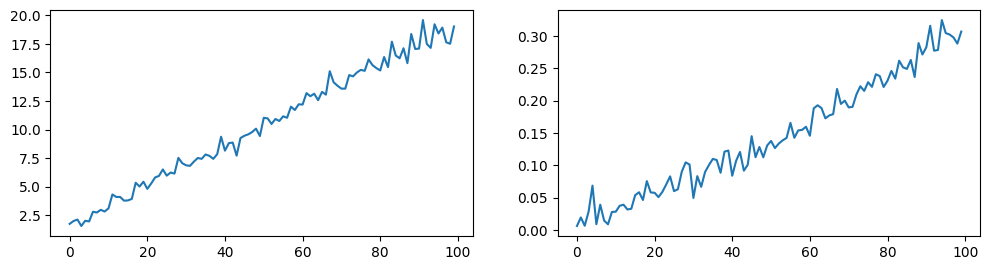

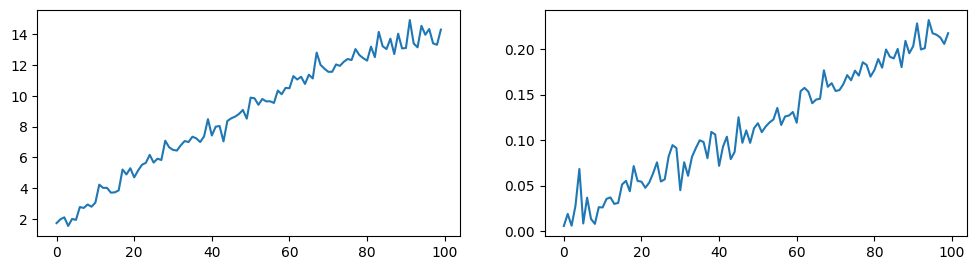

In [17]:

def plot_two_metrics(m1, m2, need_sort=False):
    if need_sort:
        sorted_xy = sorted(zip(m1, m2), key=lambda x: x[0])
        fig, axes = plt.subplots(1, 2, figsize=(12, 3), dpi=100)
        axes[0].plot([i[0] for i in sorted_xy])
        axes[1].plot([i[1] for i in sorted_xy])
        plt.show()
    else:
        fig, axes = plt.subplots(1, 2, figsize=(12, 3), dpi=100) 
        axes[0].plot(m1)
        axes[1].plot(m2)
        plt.show()
        
    

def ER_graphs_by_Degree(sample_num, class_num, node_num=100, min_Degree=3, max_Degree=20):
    """
    return labels and graphs.
    """
    
    er_nodes = 100
    ori_degree = np.random.uniform(min_Degree, max_Degree, size=(sample_num,1))
    _, scaler = z_norm(ori_degree)
    
    n_degree = np.random.uniform(0, 1, size=(sample_num, 1))
    dd = scaler.inverse_transform(n_degree)
    
    samples = []
    ori_avg_degrees, ori_cc = [], []
    new_avg_degrees, new_cc = [], []
    
    dd = np.linspace(2, 20, sample_num)
    dd = [int(i) for i in dd]
    
    for i in range(sample_num):
        sq_num = int(dd[i])
        G = nx.erdos_renyi_graph(er_nodes-2*sq_num, sq_num/(er_nodes-2*sq_num))
        
        ori_avg_degrees.append(sum(dict(G.degree()).values()) / len(G))
        ori_cc.append(nx.average_clustering(G))
        
        new_G = add_square(G, int(sq_num/3))
        
        new_avg_degrees.append(sum(dict(new_G.degree()).values()) / len(new_G))
        new_cc.append(nx.average_clustering(new_G))
        
        # samples.append(new_G)
    
    # labels:
    plot_two_metrics(ori_avg_degrees, ori_cc, need_sort=False)
    plot_two_metrics(new_avg_degrees, new_cc, need_sort=False)
    
    # labels:
    
    # n_y = np.random.uniform(0, 1, size=(sample_num, 1))
    # Y = get_Y([n_cc, n_y], class_num, rs=[0.9], is_uniform=True)
    # print(Y.shape)
    # print('len samples:', len(samples))
    # pyg_data = convert_to_torch_geometric_data(samples, Y)
    # dataset = SynDataset(pyg_data, name="CC")
    # print(dataset)
    
    
    # plt.figure()
    # plt.plot([i[0] for i in sorted_xy])
    
    # plt.figure()
    # plt.plot([i[1] for i in sorted_xy])
    # plt.title('CC', fontsize=16)
    
    # return dataset
datasets = ER_graphs_by_Degree(100, 10)

std1:  10.15247422163905
cc_uniform:  (1000,)


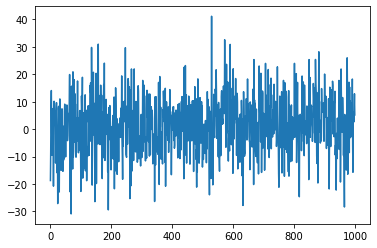

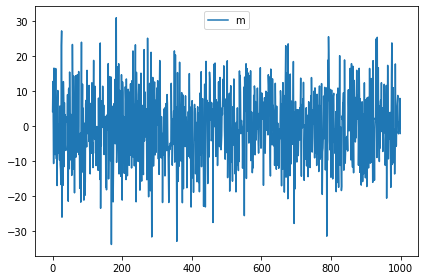

In [164]:
cc_uniform = np.random.normal(1, 10, size=1000)

std =  np.std(cc_uniform)
print('std1: ', std)
print("cc_uniform: ", cc_uniform.shape)

cc, scaler = z_norm(cc_uniform.reshape(-1, 1))
cc = cc*15

new_cc = np.random.normal(0, 1, size=1000)
# std=  np.std(cc)

old_cc = new_cc * std
# old_cc = scaler.inverse_transform(new_cc.reshape(-1, 1))

# NOTE: for normal and uniform, the recover approach is not different !!!!!!

plt.figure()
plt.plot(cc_uniform)
plt.figure()
plt.plot(old_cc)
plt.legend("me", loc="upper center")
plt.tight_layout()

In [ ]:
#